In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import pickle 

with open('portf_all.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
    
with open('portf_6.pkl', 'rb') as f:
    portf_6 = pickle.load(f)
    
loaded_data = loaded_data[:4] + portf_6 + loaded_data[4:]

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.patches import Rectangle

In [4]:
data = pd.read_excel('./data/data.xlsx')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('Unnamed: 0')
data.index.name = None

#data slicer
indmin = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.min()).values
indmax = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.max()).values

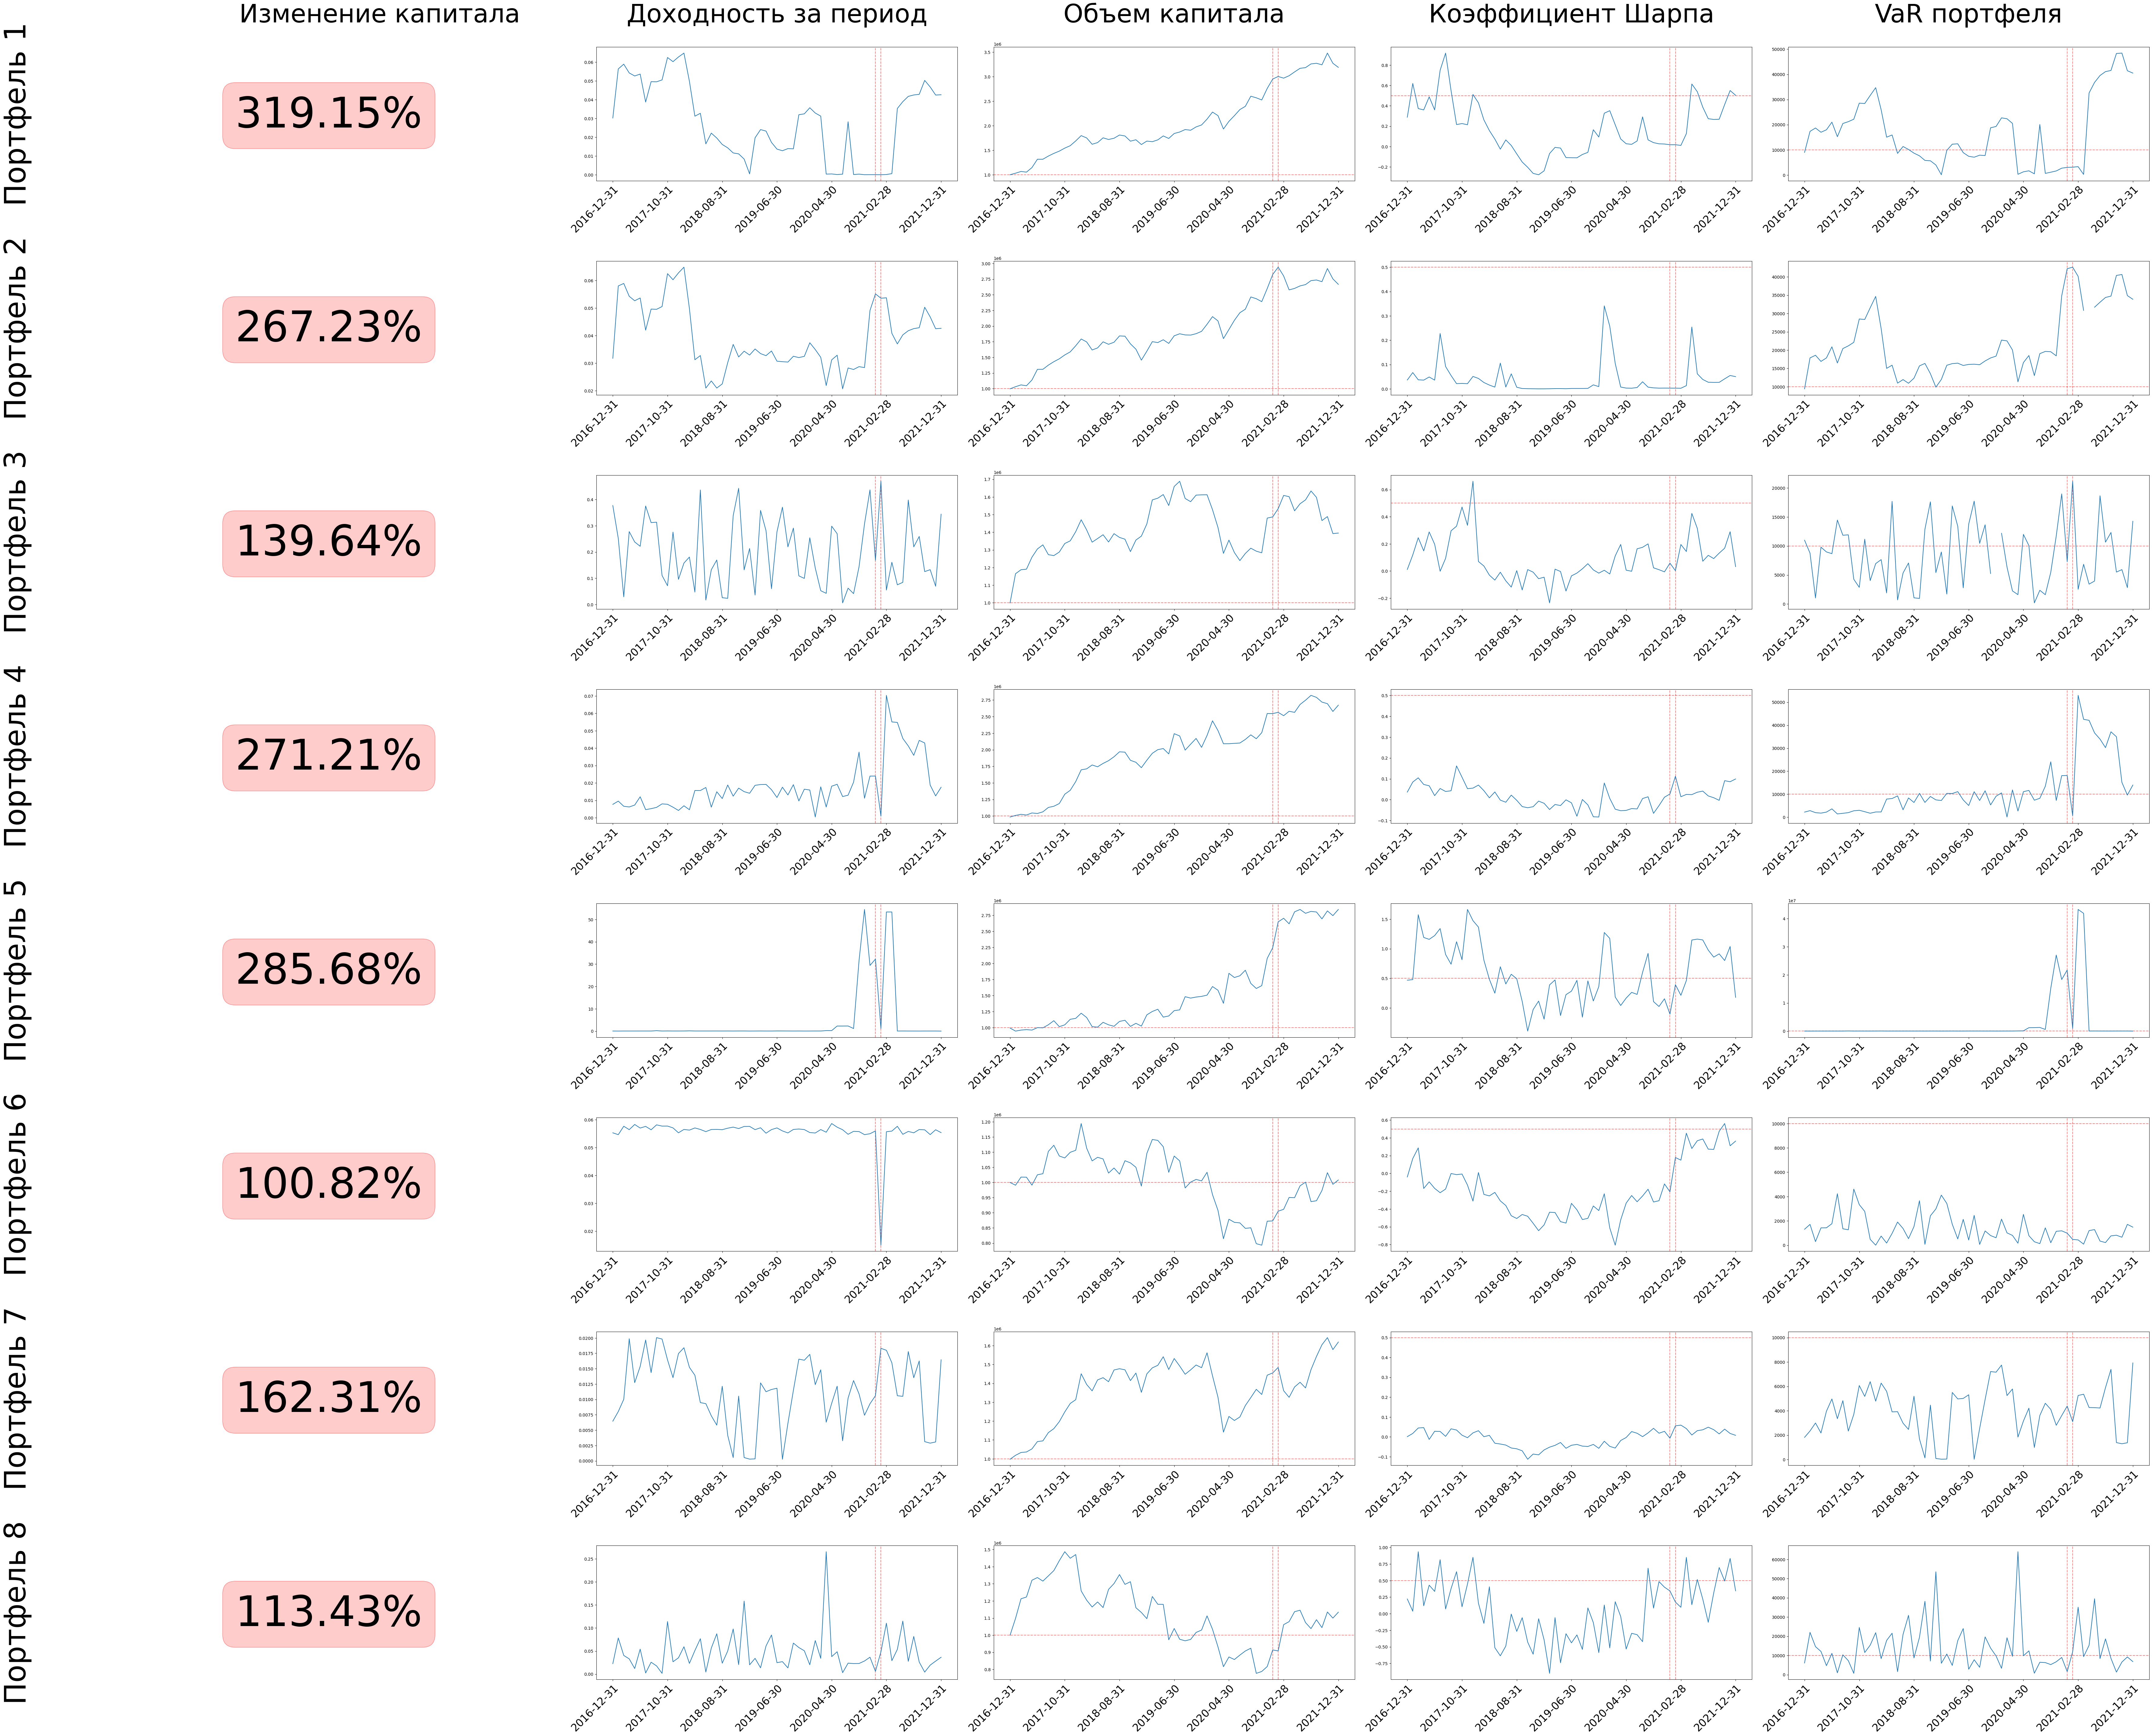

In [5]:
fig = plt.figure(figsize=(100, 70))
#fig = plt.figure(figsize=(11.69, 8.27))
ghj = []
#grid = gridspec.GridSpec(8, 13, figure=fig, hspace=0.1, wspace=0.5)
grid = gridspec.GridSpec(8, 6, figure=fig, hspace=0.6, wspace=0.1)

for i in range(len(loaded_data)):
    ax = fig.add_subplot(grid[i, 0])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    txt = round(loaded_data[i][0][0] * 100, 2)
    im = ax.text(0.1
                 , 0.4
                 , str(txt)+'%'
                 , dict(size=100)
                 , bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5) ,fc=(1., 0.8, 0.8)))
    
    for j, ind in enumerate([1, 2, 4, 9]):
        ax = fig.add_subplot(grid[i, j+1])
        if j == 1:
            ax.axhline(y=1000000, color='red', linestyle='--', alpha=0.5)
        elif j == 2:
            ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
        elif j == 3:
            ax.axhline(y=10000, color='red', linestyle='--', alpha=0.5)
        x_ticks = [np.datetime_as_string(kk, unit='D') for kk in indmax[11:]]
        ax.set_xticks(range(0, len(x_ticks), 10), x_ticks[0::10], rotation=45, ha="right", rotation_mode="anchor", fontsize=25)
        ax.axvline(x=48, color='red', linestyle='--', alpha=0.5)
        ax.axvline(x=49, color='red', linestyle='--', alpha=0.5)
        #y_ticks = [round(k, 3) for k in loaded_data[i][ind]]
        #y_ticks.sort()
        #ax.set_yticks(range(0, len(y_ticks), 15), labels=y_ticks[0::15], fontsize=15)
        #ax.set_yticks(range(0, 61, 4), labels=[round(k, 3) for k in np.linspace(min(y_ticks), max(y_ticks), 16)], fontsize=15)
        #ghj.append([round(k, 3) for k in np.linspace(min(y_ticks), max(y_ticks), 16)])
        im = ax.plot(loaded_data[i][ind])

col_titles = ['Изменение капитала', 'Доходность за период', 'Объем капитала', 'Коэффициент Шарпа', 'VaR портфеля']
for j in range(len(col_titles)):
    pos = grid[0, j].get_position(fig)
    fig.text(x=pos.x0 + pos.width/2
             , y=pos.y0 + pos.height + 0.015
             , s=col_titles[j]
             , ha='center'
             , va='center'
             , fontsize=60)
    
for i in range(8):
    pos = grid[i, 0].get_position(fig)
    fig.text(x=pos.x0 - 0.06
             , y=pos.y0 + pos.height/2
             , s='Портфель ' + str(i+1)
             , ha='center'
             , va='center'
             , fontsize=70
             , rotation=90)

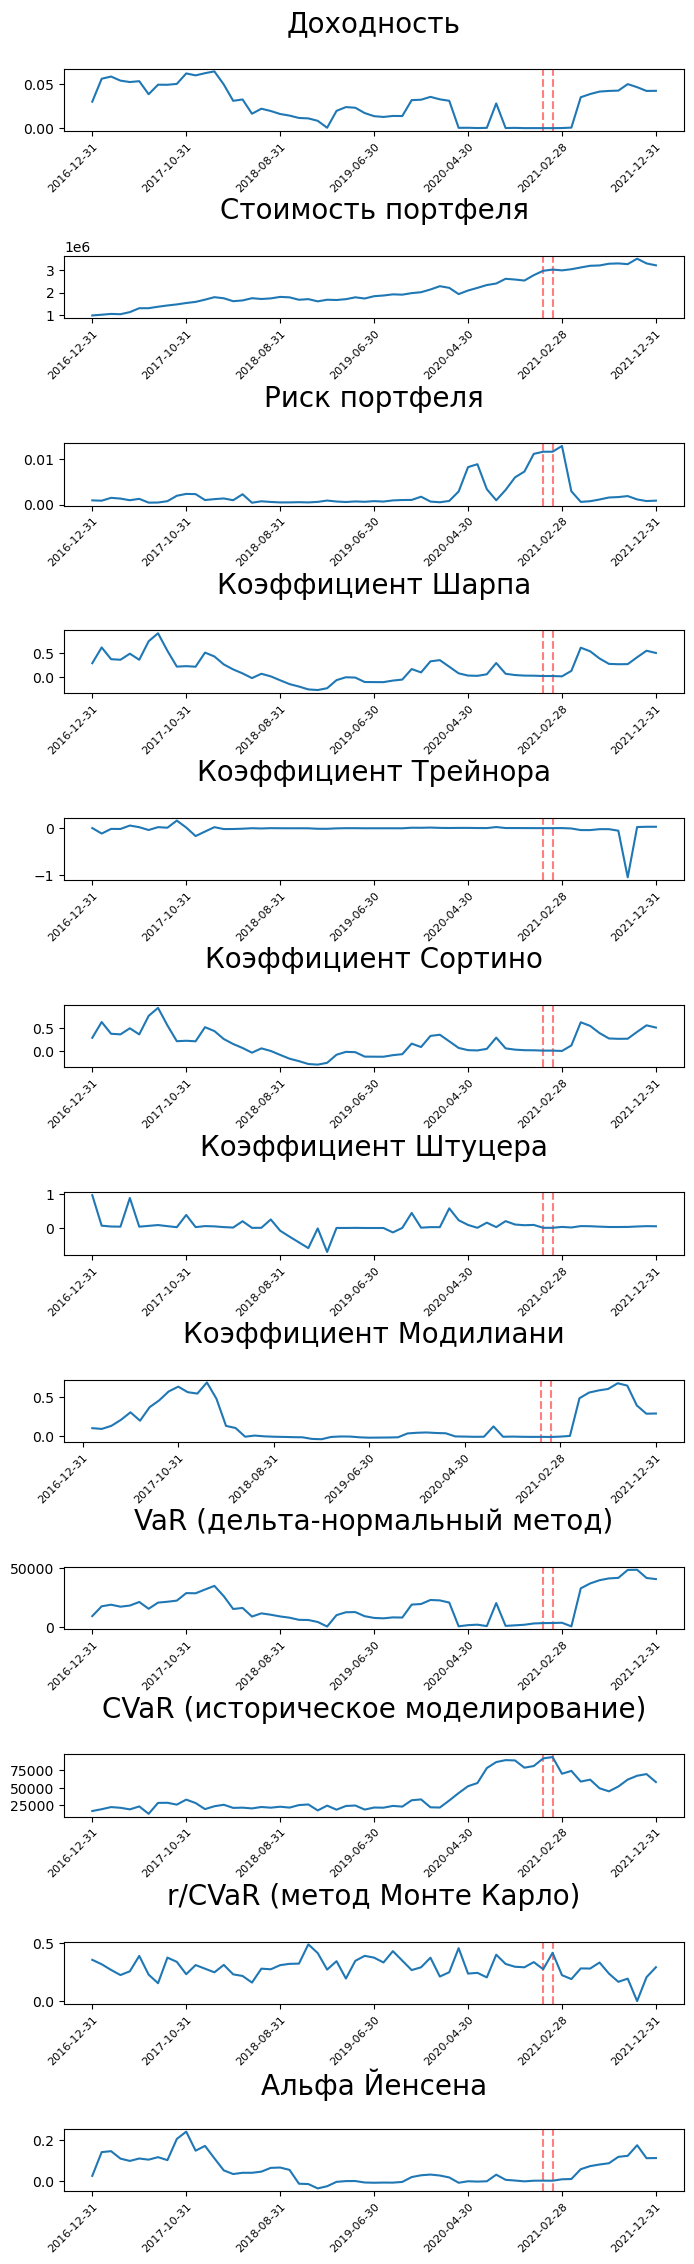

In [6]:
#fig = plt.figure(figsize=(20, 100))
fig = plt.figure(figsize=(8, 30))

#grid = gridspec.GridSpec(8, 13, figure=fig, hspace=0.1, wspace=0.5)
grid = gridspec.GridSpec(13, 1, figure=fig, hspace=2, wspace=0.1)

for i in range(1, 13):
    ax = fig.add_subplot(grid[i, 0])
    x_ticks = [np.datetime_as_string(kk, unit='D') for kk in indmax[11:]]
    ax.set_xticks(range(0, len(x_ticks), 10), x_ticks[0::10], rotation=45, ha="right", rotation_mode="anchor", fontsize=8)
    ax.axvline(x=48, color='red', linestyle='--', alpha=0.5)
    ax.axvline(x=49, color='red', linestyle='--', alpha=0.5)
    im = ax.plot(loaded_data[0][i])

col_titles = ['Доходность'
              , 'Стоимость портфеля'
              , 'Риск портфеля'
              , 'Коэффициент Шарпа'
              , 'Коэффициент Трейнора'
             , 'Коэффициент Сортино'
             , 'Коэффициент Штуцера'
             , 'Коэффициент Модилиани'
             , 'VaR (дельта-нормальный метод)'
             , 'CVaR (историческое моделирование)'
             , 'r/CVaR (метод Монте Карло)'
             , 'Альфа Йенсена']
for j in range(1, 13):
    pos = grid[j, 0].get_position(fig)
    fig.text(x=pos.x0 + pos.width/2
             , y=pos.y0 + pos.height + 0.015
             , s=col_titles[j-1]
             , ha='center'
             , va='center'
             , fontsize=20)

In [7]:
import matplotlib.colors as colors

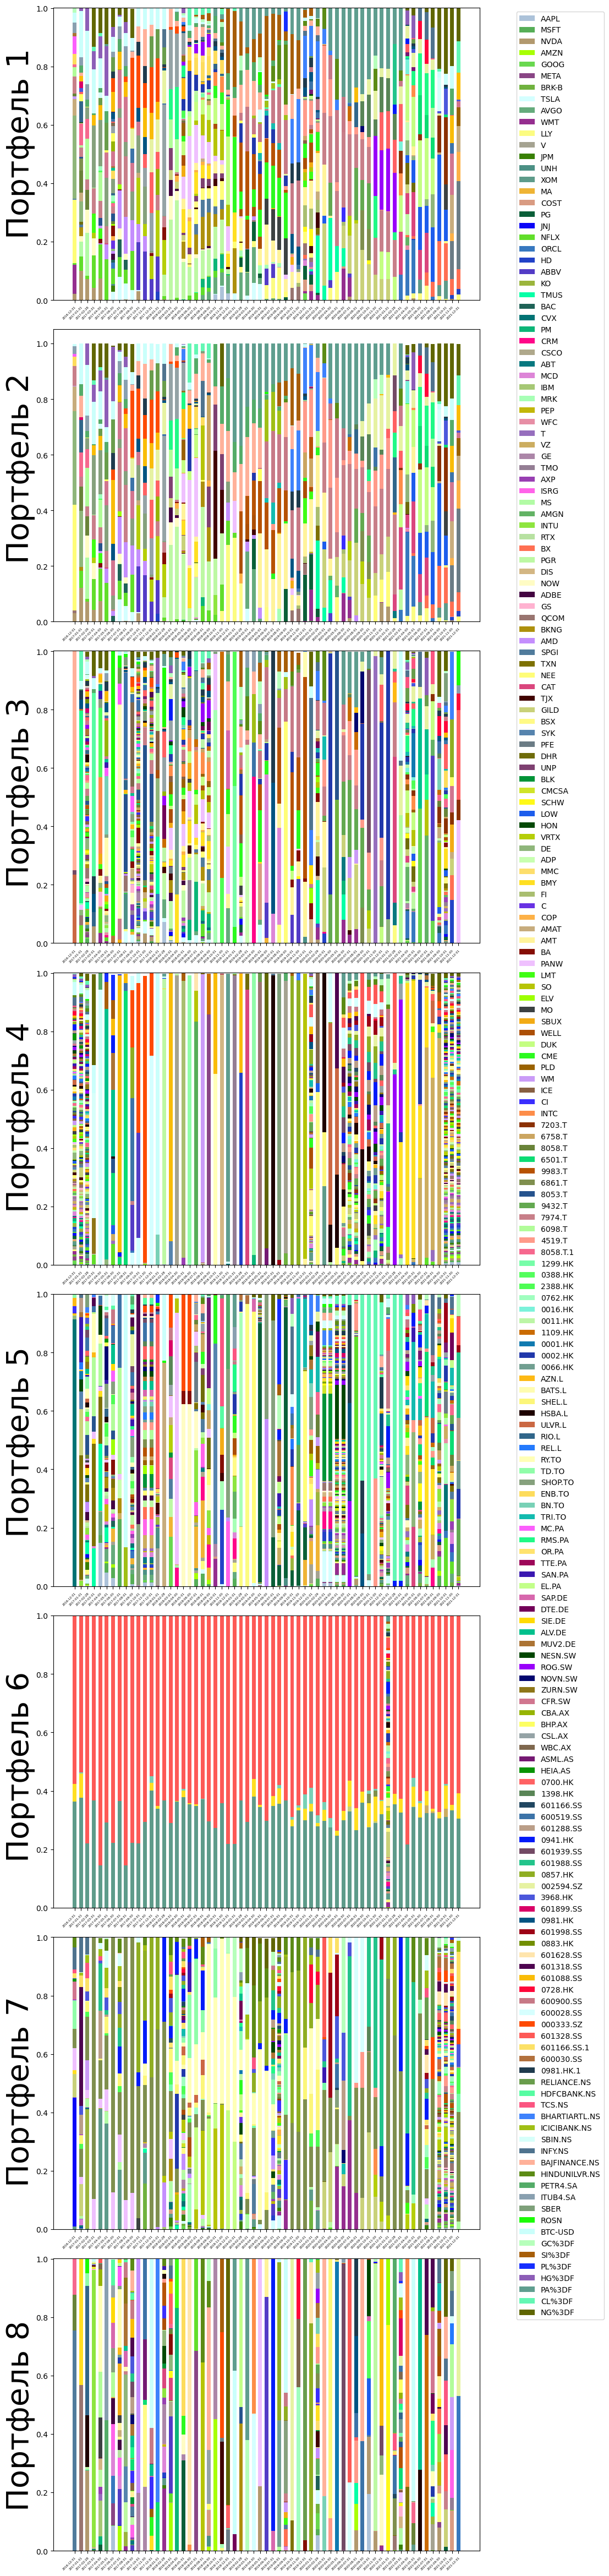

In [11]:
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(10, 60))
colors_l = list(colors._colors_full_map.values())

for portf, ax in enumerate(axs):
    asset_classes = data.columns
    periods = [f'Период {i+1}' for i in range(len(loaded_data[portf][-1]))]
    datas = np.array(loaded_data[portf][-1])
    bar_width = 0.6
    bottom = np.zeros(len(periods))
    datas_m = []
    for kk in range(len(datas)):
        pre_datas = []
        for ff in datas[kk]:
            if ff >= 0 and ff <= 1:
                pre_datas.append(ff)
            else:
                pre_datas.append(0)
        if sum(pre_datas) > 1.03:
            pre_datas = [gh / sum(pre_datas) for gh in pre_datas]
        datas_m.append(pre_datas)
    datas_m = np.array(datas_m)

    for i, asset in enumerate(asset_classes):
        ax.bar(periods
               , datas_m[:, i]
               , width=bar_width
               , bottom=bottom
               , label=asset
               , color=colors_l[i])
        bottom += datas_m[:, i]
    x_ticks = [np.datetime_as_string(kk, unit='D') for kk in indmax[11:]]
    ax.set_xticks(range(0, len(x_ticks)), x_ticks, rotation=45, ha="right", rotation_mode="anchor", fontsize=4)
    if portf == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
    pos = ax.get_position(fig)
    fig.text(x=pos.x0 - 0.06
             , y=pos.y0 + pos.height/2
             , s='Портфель ' + str(portf+1)
             , ha='center'
             , va='center'
             , fontsize=40
             , rotation=90)

plt.subplots_adjust(hspace=0.1)